In [32]:
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)
cell_tidy_data = cell_tidy_data[cell_tidy_data['MajorType'] == 'DG'].copy()

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
gene_rates = xr.open_mfdataset(
    '/home/hanliu/project/mouse_rostral_brain/study/Level1-CellClass/ALL_manual/Adata/GeneWithSlop2kb.gene_da_rate*.mcds',
    concat_dim='cell', combine='nested').sel(cell=cell_tidy_data.index, mc_type='CHN')['gene_da'].to_pandas()

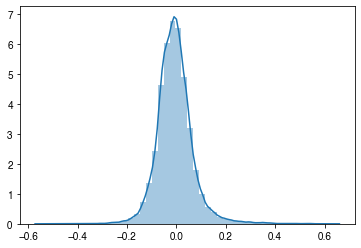

In [39]:
gene_corr = gene_rates.corrwith(cell_tidy_data['CH_RateAdj'])
gene_corr = gene_corr.fillna(0)
sns.distplot(gene_corr)

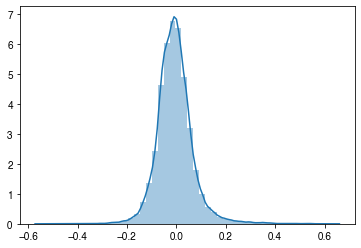

In [45]:
null_gene_corr = gene_rates.corrwith(cell_tidy_data['CH_RateAdj'].sample(6179))
null_gene_corr = null_gene_corr.fillna(0)
sns.distplot(null_gene_corr)